In [1]:
import plotly
import kaleido

print("Plotly version:", plotly.__version__)
import importlib.metadata
print("Kaleido version:", importlib.metadata.version("kaleido"))

Plotly version: 6.2.0
Kaleido version: 1.0.0


In [2]:
import becquerel as bq 
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, r'..')
import SideBand
from PF import PF
import analysis_methods as am

In [3]:
soil_sample_15598 = bq.Spectrum.from_file(r"data/15598_soil_sample.Spe") #berkeley control sample
background_15598 = bq.Spectrum.from_file(r"data/rayleigh_background_6_12_25.Spe")
subtracted_spec_15598 = soil_sample_15598 - background_15598

soil_sample_67649 = bq.Spectrum.from_file(r"data/67649_soil_sample.Spe")
soil_sample_31760 = bq.Spectrum.from_file(r"data/31760_Soil_Sample.Spe")

background_67649 = bq.Spectrum.from_file(r"data/rayleigh_background_6_12_25.Spe")
subtracted_spec_67649 = soil_sample_67649-background_67649

background_31760 = bq.Spectrum.from_file(r"data/rayleigh_background_4_25_25.Spe")
background_31760 = background_31760.rebin(soil_sample_31760.bin_edges_kev)
subtracted_spec_31760 = soil_sample_31760 - background_31760

SpeFile: Reading file data/15598_soil_sample.Spe
SpeFile: Reading file data/rayleigh_background_6_12_25.Spe


C:\Users\twang\AppData\Local\Programs\Python\Python311\Lib\site-packages\becquerel\core\spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


SpeFile: Reading file data/67649_soil_sample.Spe
SpeFile: Reading file data/31760_Soil_Sample.Spe
SpeFile: Reading file data/rayleigh_background_6_12_25.Spe
SpeFile: Reading file data/rayleigh_background_4_25_25.Spe


C:\Users\twang\AppData\Local\Programs\Python\Python311\Lib\site-packages\becquerel\core\rebin.py:51: RebinWarning: The first input edge is larger than the first output edge, zeros will padded on the left side of the new spectrum
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

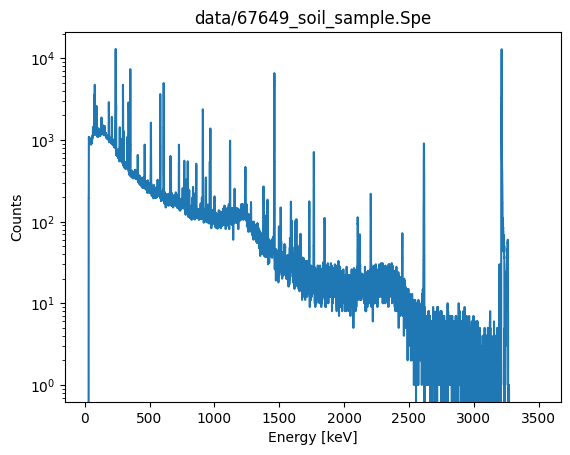

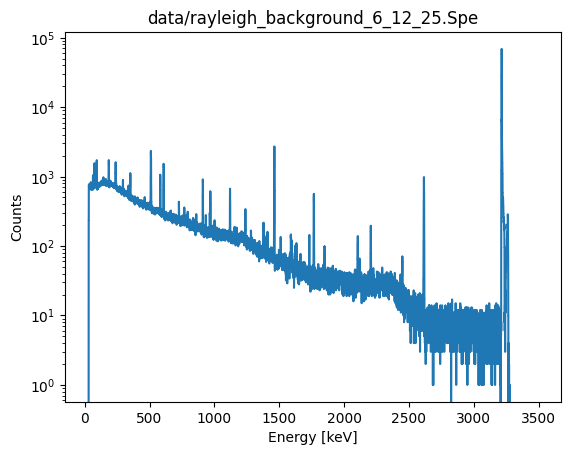

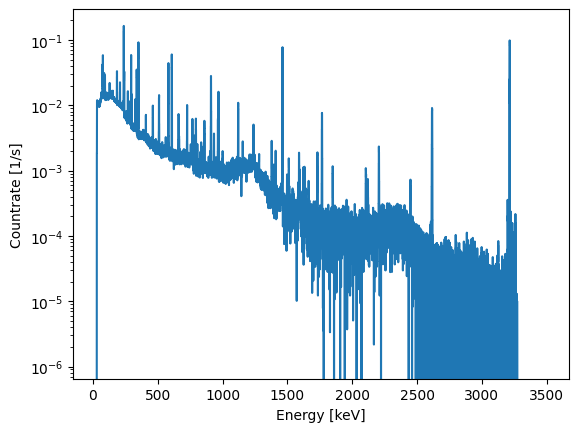

In [4]:
soil_sample_67649.plot(yscale = 'log')
background_67649.plot(yscale = 'log')
subtracted_spec_67649.plot(yscale = 'log')

<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

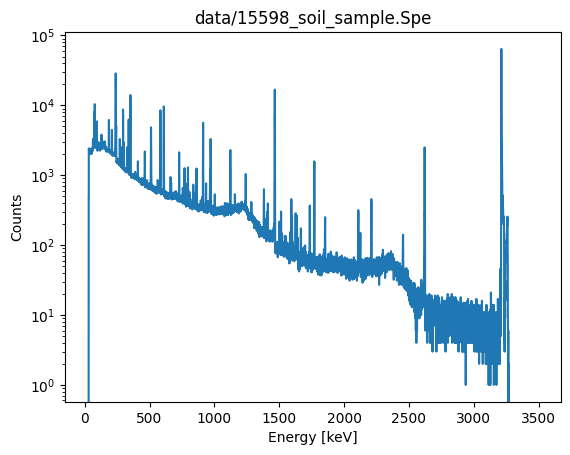

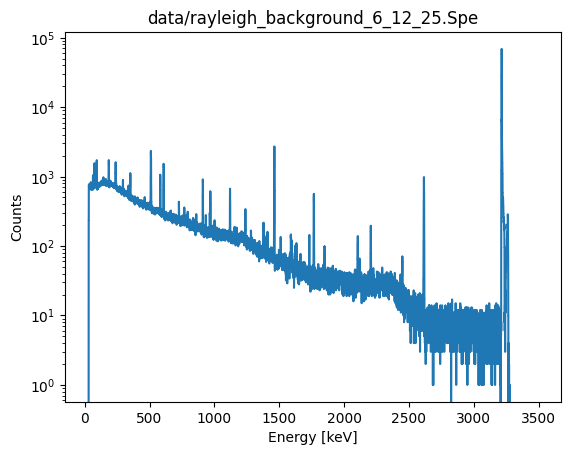

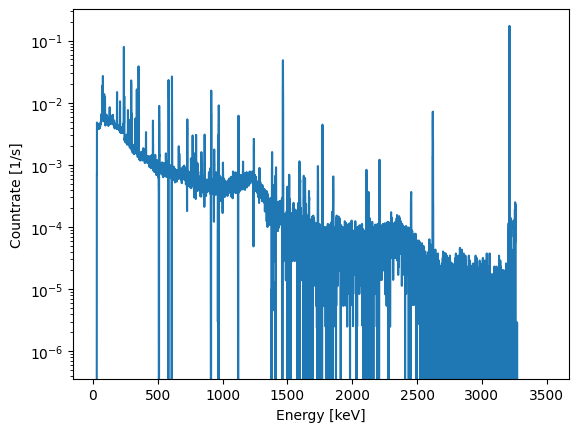

In [5]:
soil_sample_15598.plot(yscale = 'log')
background_15598.plot(yscale = 'log')
subtracted_spec_15598.plot(yscale = 'log')

We're looking for specific isotopes so we can try marking them down based on their energies.

In [6]:
cs137_energies = [661.657]
bi214_energies = [609.31, 1120.29, 1764.49]
k40_energies = [1460.83]
tl208_energies = [2614.511]

energies = np.concatenate([cs137_energies, bi214_energies, k40_energies,tl208_energies])
energies

array([ 661.657,  609.31 , 1120.29 , 1764.49 , 1460.83 , 2614.511])

In [7]:
# To find the closest value in the binning to the energy we want
def closest_bin(value, bins):
    difference = np.abs(value - bins)
    return bins[np.argmin(difference)]

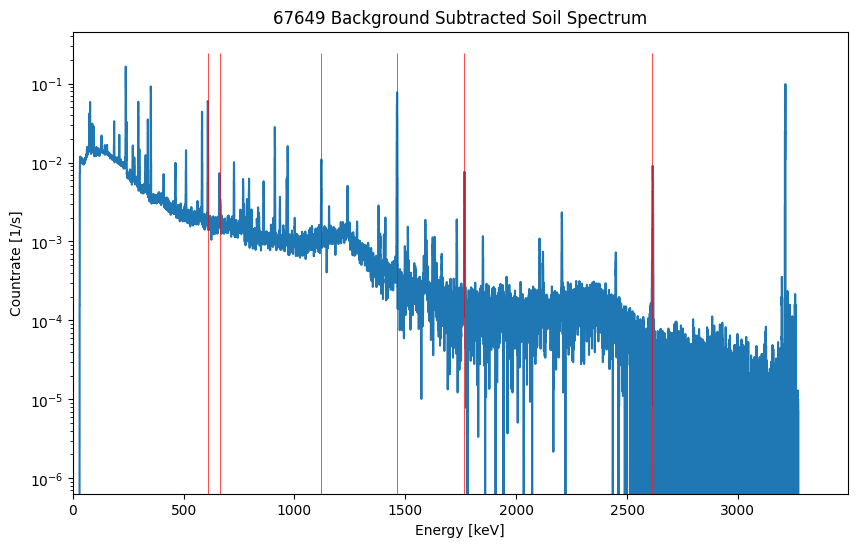

In [8]:
fix, ax = plt.subplots(figsize = (10, 6))
ax.set_yscale('log')
ax.set_title('67649 Background Subtracted Soil Spectrum')
ax.set_xlim(0, np.max(subtracted_spec_67649.bin_centers_kev))
subtracted_spec_67649.plot(ax=ax)
# Compact way to perform a function on a list
indexes = [closest_bin(energy, subtracted_spec_67649.bin_centers_kev) for energy in energies]
ax.vlines(indexes, ymin=0, ymax=np.max(subtracted_spec_67649.cps_vals) * 1.5, colors = "red", linewidth=0.5)

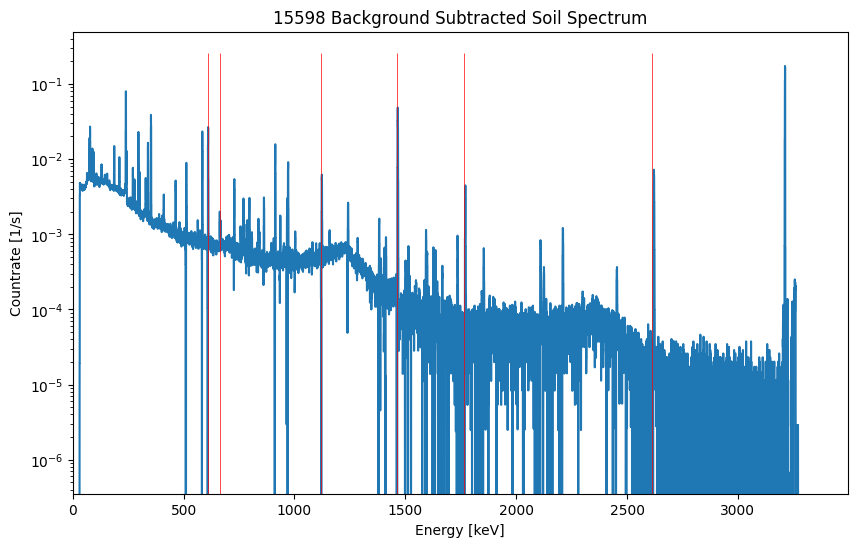

In [9]:
fix, ax = plt.subplots(figsize = (10, 6))
ax.set_yscale('log')
ax.set_title('15598 Background Subtracted Soil Spectrum')
ax.set_xlim(0, np.max(subtracted_spec_15598.bin_centers_kev))
subtracted_spec_15598.plot(ax=ax)
# Compact way to perform a function on a list
indexes = [closest_bin(energy, subtracted_spec_15598.bin_centers_kev) for energy in energies]
ax.vlines(indexes, ymin=0, ymax=np.max(subtracted_spec_15598.cps_vals) * 1.5, colors = "red", linewidth=0.5)

# We have two different region of interest methods, here's how to use both

Peak counts at 661.657 keV: 3352.15263020758
Background counts: 661.657 keV: 1606.3706460645112
Peak counts at 609.31 keV: 19018.300529805158
Background counts: 609.31 keV: 2483.4432616311046
Peak counts at 1120.29 keV: 5724.696036594193
Background counts: 1120.29 keV: 2150.0553660866794
Peak counts at 1764.49 keV: 3394.0246084363507
Background counts: 1764.49 keV: 238.44877971106797
Peak counts at 1460.83 keV: 31300.55631857793
Background counts: 1460.83 keV: 667.2266205379115
Peak counts at 2614.511 keV: 4971.369271300773
Background counts: 2614.511 keV: 51.184922886672986


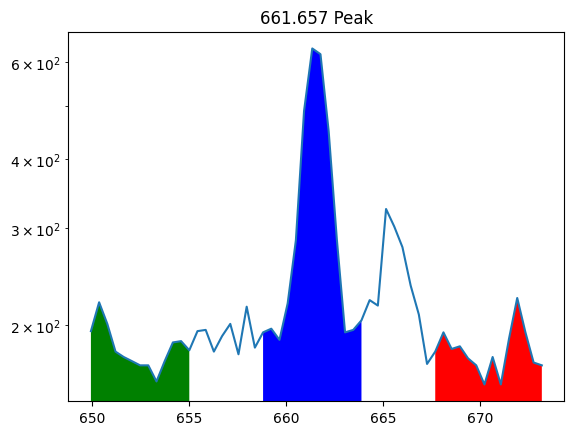

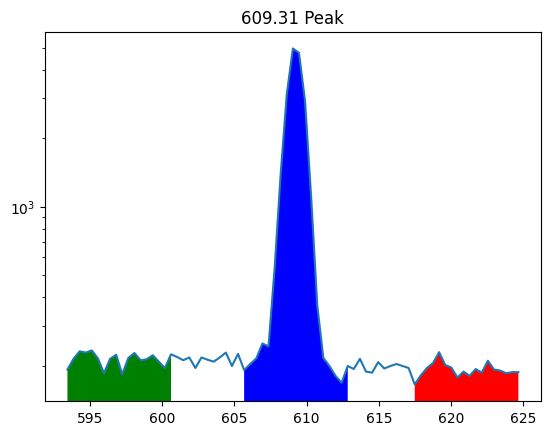

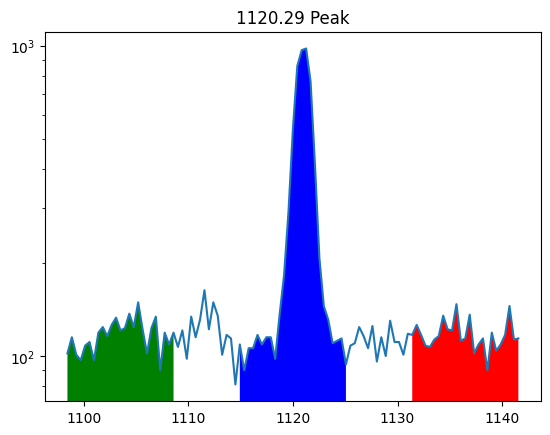

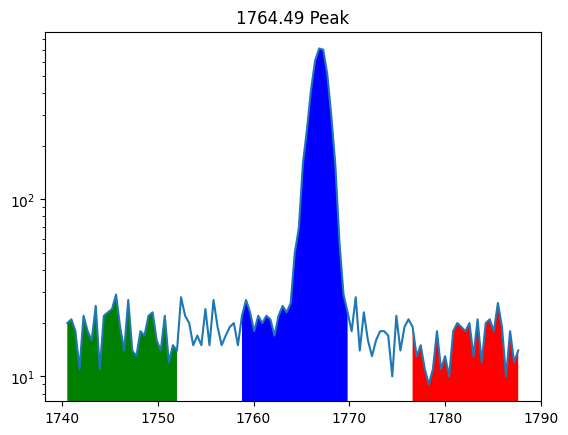

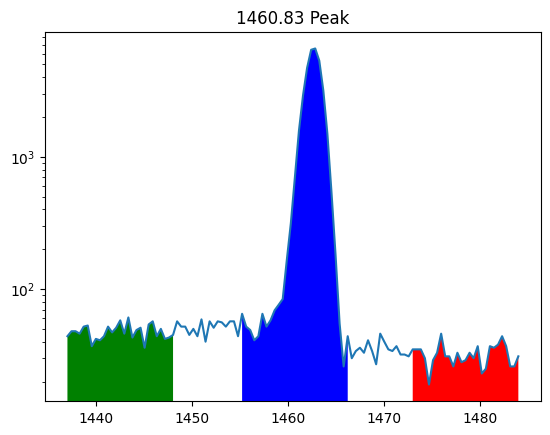

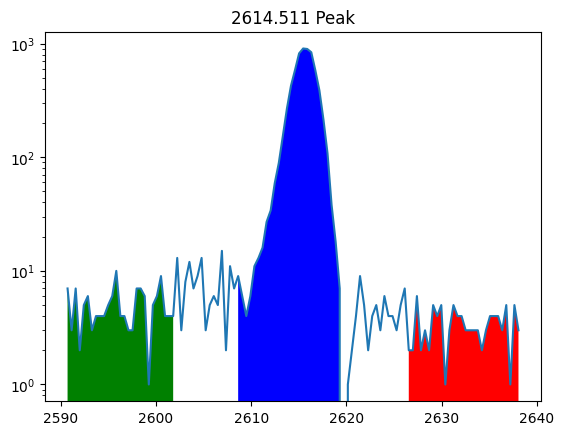

In [10]:
roi = SideBand.ROI(spec = soil_sample_67649, bg = background_67649, e_peaks = energies)

# Cs-137
roi.set_sideband(661.657, 6, [[-2, -1], [-0.5, 0.5], [1, 2]])

# Bi-214
roi.set_sideband(609.31, 8, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi.set_sideband(1120.29, 11, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi.set_sideband(1764.49, 12, [[-2, -1], [-0.5, 0.5], [1, 2]])

# K-40
roi.set_sideband(1460.83, 12, [[-2, -1], [-0.5, 0.5], [1, 2]])

# Tl-208
roi.set_sideband(2614.511, 12, [[-2, -1], [-0.5, 0.5], [1, 2]])

# Plot the ROI for each energy peak
for energy in energies:
    roi.plot_peak_region(spectrum=soil_sample_67649, key=energy)
sideband_counts, sideband_counts_unc = roi.get_counts()

Peak counts at 661.657 keV: 5201.41148779711
Background counts: 661.657 keV: 3766.0990460134817
Peak counts at 609.31 keV: 33994.330094670106
Background counts: 609.31 keV: 4818.614779537362
Peak counts at 1120.29 keV: 11526.912776121131
Background counts: 1120.29 keV: 5012.790306707971
Peak counts at 1764.49 keV: 6264.5362844156225
Background counts: 1764.49 keV: 678.7067194128166
Peak counts at 1460.83 keV: 74275.69680090329
Background counts: 1460.83 keV: 1612.809183611103
Peak counts at 2614.511 keV: 11043.931206392404
Background counts: 2614.511 keV: 203.16231069770774


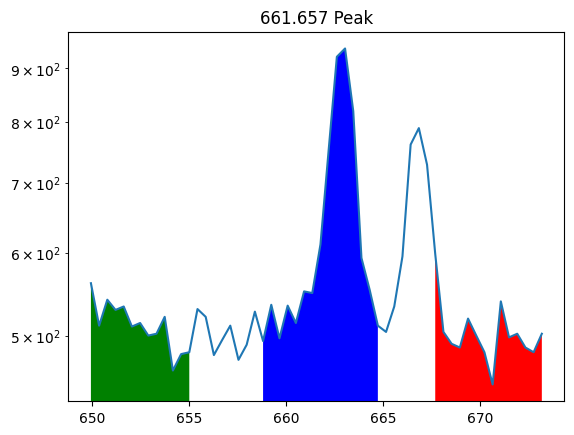

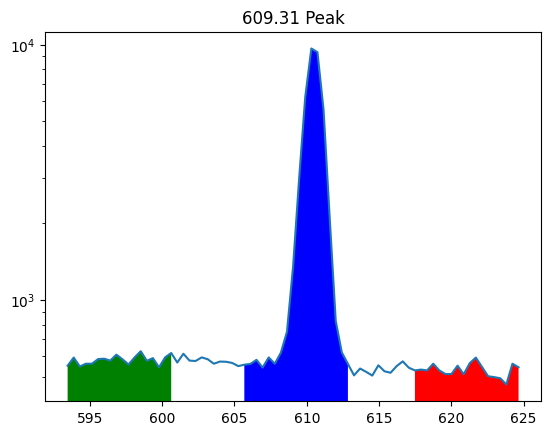

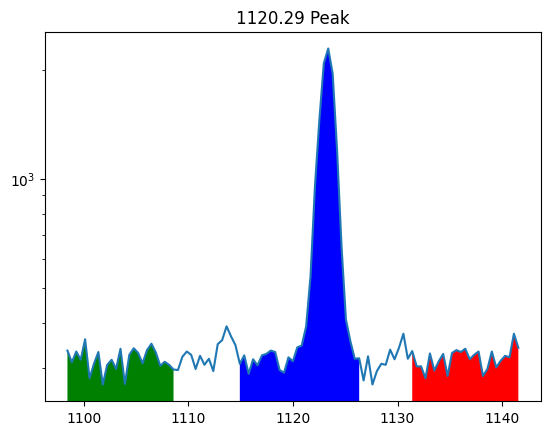

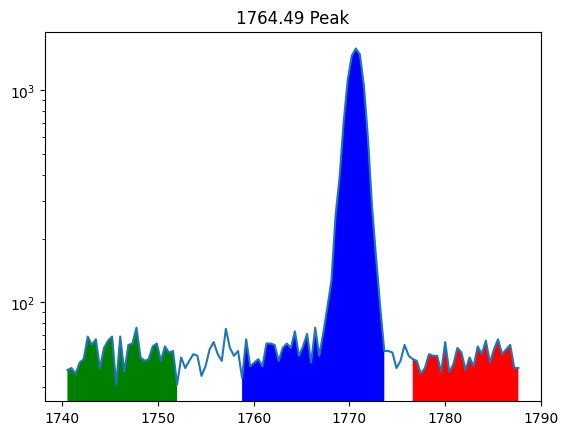

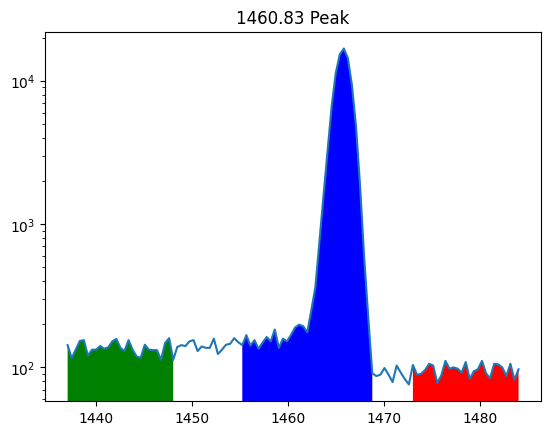

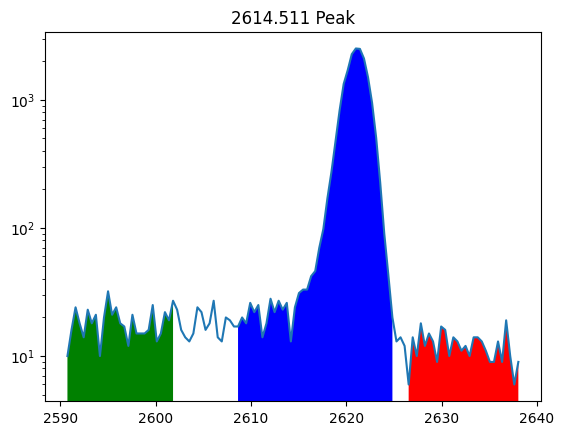

In [11]:
# Create an SideBand ROI object for the soil sample spectrum of the CONTROL group
roi_ctrl = SideBand.ROI(spec = soil_sample_15598, bg = background_15598, e_peaks = energies)

# For each energy tweak the values until the ROI is well defined
# Cs-137
roi_ctrl.set_sideband(661.657, 6, [[-2, -1], [-0.5, 0.6], [1, 2]])

# Bi-214
roi_ctrl.set_sideband(609.31, 8, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi_ctrl.set_sideband(1120.29, 11, [[-2, -1], [-0.5, 0.6], [1, 2]])
roi_ctrl.set_sideband(1764.49, 12, [[-2, -1], [-0.5, 0.8], [1, 2]])

# K-40
roi_ctrl.set_sideband(1460.83, 12, [[-2, -1], [-0.5, 0.7], [1, 2]])

# Tl-208
roi_ctrl.set_sideband(2614.511, 12, [[-2, -1], [-0.5, 0.9], [1, 2]])

# Plot the ROI for each energy peak
for energy in energies:
    roi_ctrl.plot_peak_region(spectrum=soil_sample_15598, key=energy)
sideband_ctrl_counts, sideband_ctrl_counts_unc = roi_ctrl.get_counts()

Peak counts at 661.657 keV: 14852.271741766384
Background counts: 661.657 keV: 7307.324015304676
Peak counts at 609.31 keV: 67777.40502195324
Background counts: 609.31 keV: 11100.244959052605
Peak counts at 1120.29 keV: 22202.188896243755
Background counts: 1120.29 keV: 9105.474736792094
Peak counts at 1764.49 keV: 13030.372027279986
Background counts: 1764.49 keV: 1309.368687972703
Peak counts at 1460.83 keV: 128974.14896699629
Background counts: 1460.83 keV: 3375.071542732297
Peak counts at 2614.511 keV: 19335.10407119133
Background counts: 2614.511 keV: 187.98833086528776


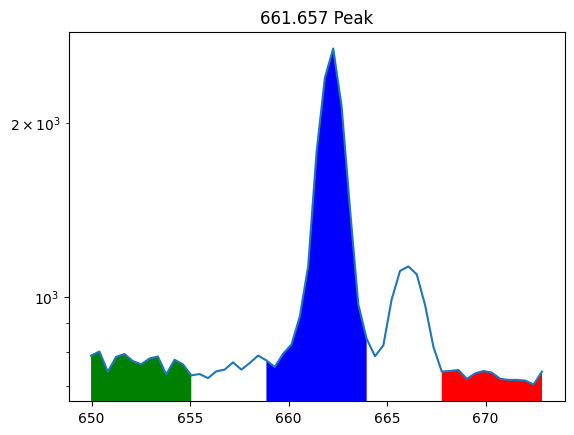

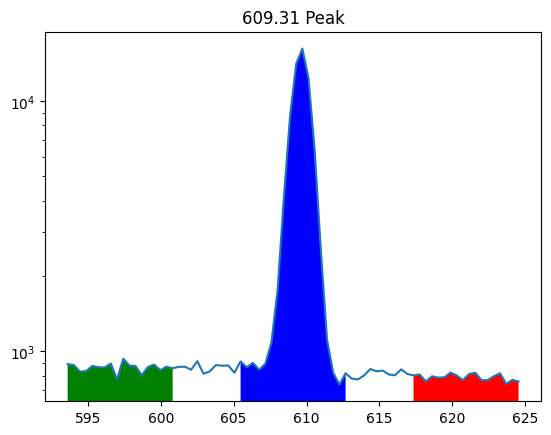

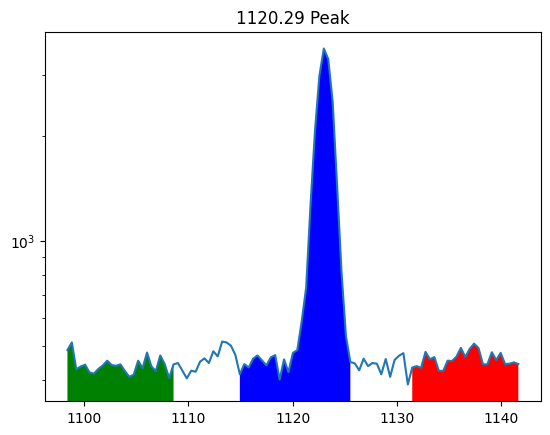

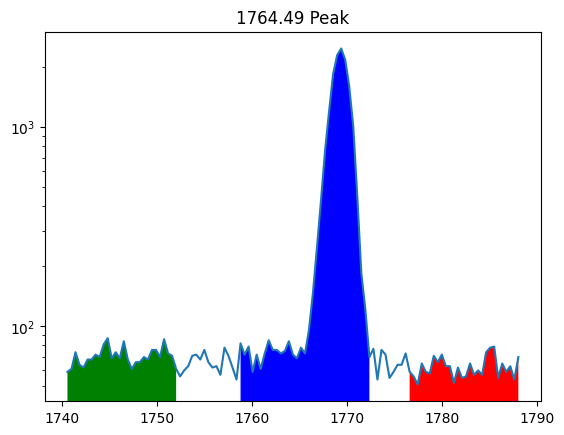

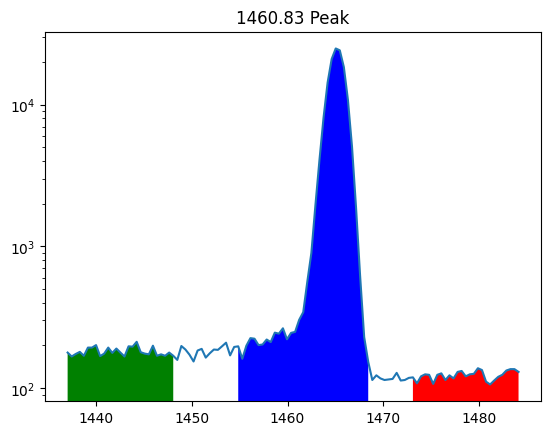

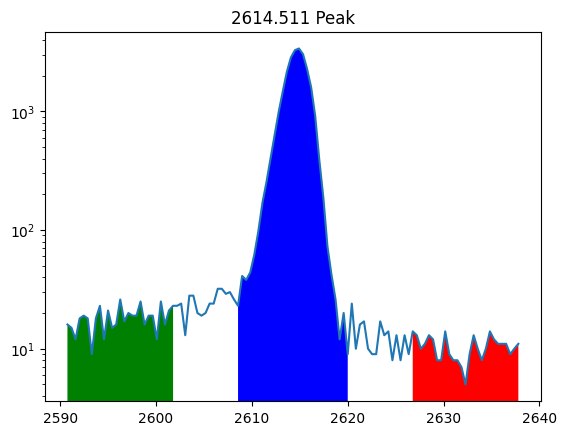

In [12]:
roi_31760 = SideBand.ROI(spec = soil_sample_31760, bg = background_31760, e_peaks = energies)

# Cs-137
roi_31760.set_sideband(661.657, 6, [[-2, -1], [-0.5, 0.5], [1, 2]])

# Bi-214
roi_31760.set_sideband(609.31, 8, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi_31760.set_sideband(1120.29, 11, [[-2, -1], [-0.5, 0.52], [1, 2]])
roi_31760.set_sideband(1764.49, 12, [[-2, -1], [-0.5, 0.7], [1, 2]])

# K-40
roi_31760.set_sideband(1460.83, 12, [[-2, -1], [-0.5, 0.7], [1, 2]])

# Tl-208
roi_31760.set_sideband(2614.511, 12, [[-2, -1], [-0.5, 0.5], [1, 2]])

# Plot the ROI for each energy peak
for energy in energies:
    roi_31760.plot_peak_region(spectrum=soil_sample_31760, key=energy)
sideband_counts_31760, sideband_counts_unc_31760 = roi_31760.get_counts()

C:\Users\twang\AppData\Local\Programs\Python\Python311\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


Counts at 661.657 keV: 1923.5526085732042 +/- 1923.5207943046905)


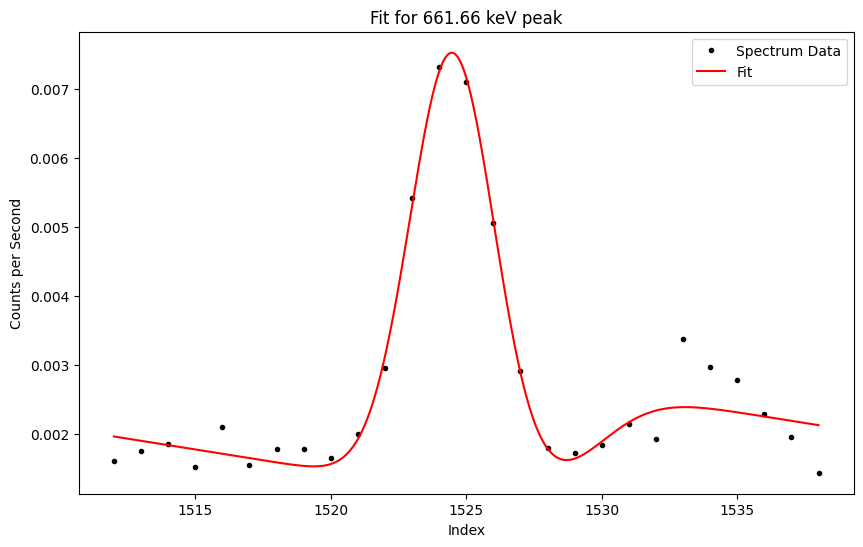

Counts at 609.31 keV: 16581.279702983742 +/- 188.8433937526297)


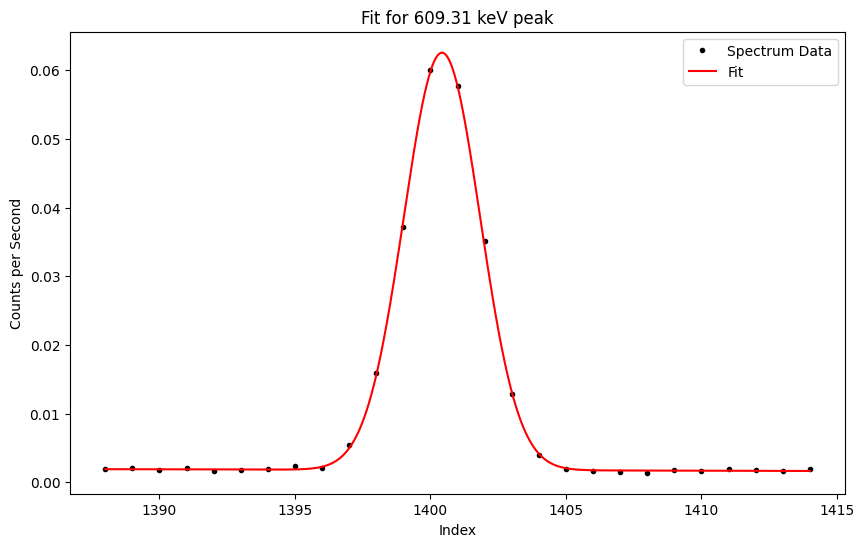

Counts at 1120.29 keV: 3754.9204620094765 +/- 3754.3852137151925)


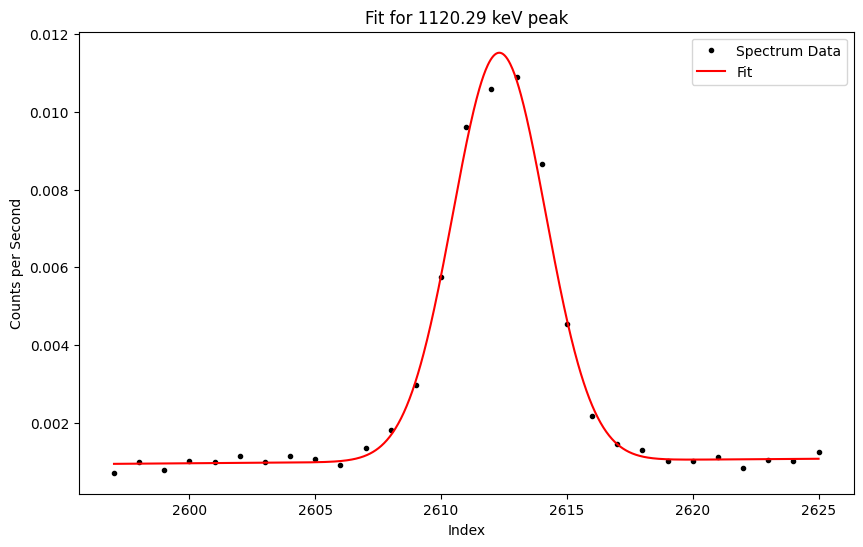

Counts at 1764.49 keV: 3034.385530661964 +/- 3005.6687334439403)


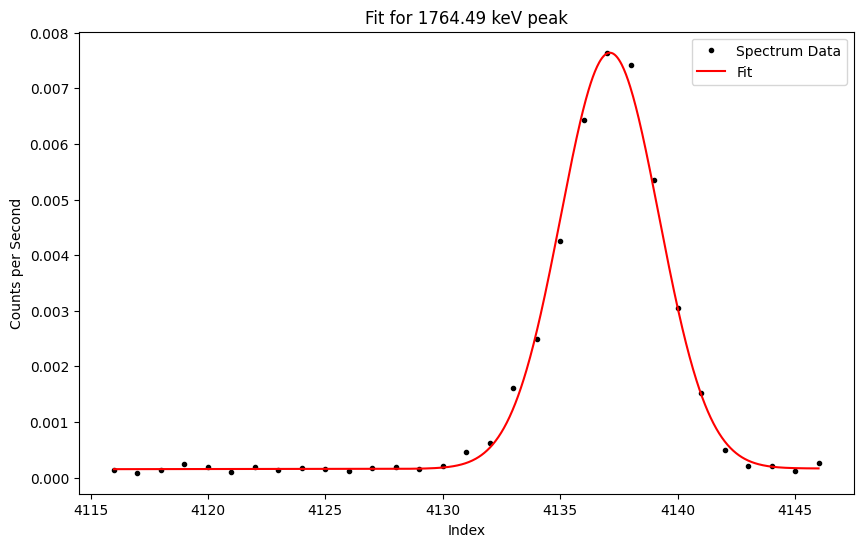

Counts at 1460.83 keV: 29950.722369500752 +/- 482.1394457669776)


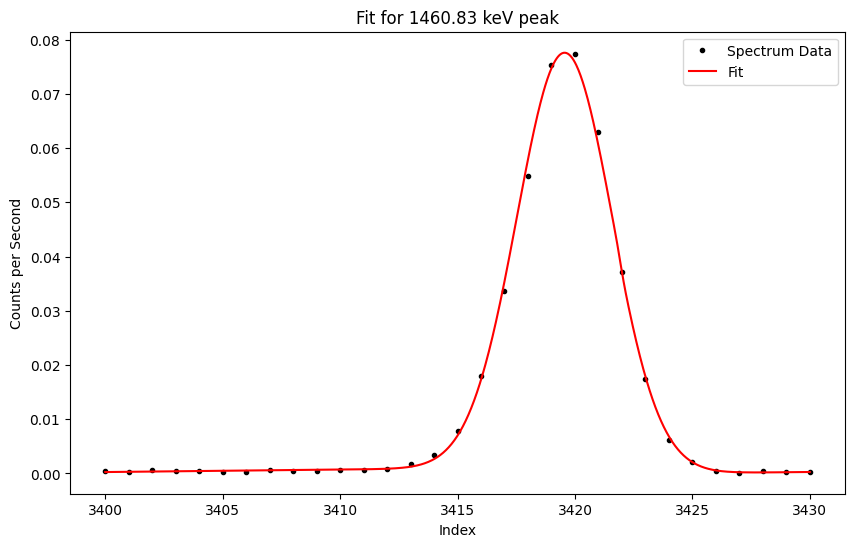

Counts at 2614.511 keV: 4773.734355024517 +/- 127.27701404762956)


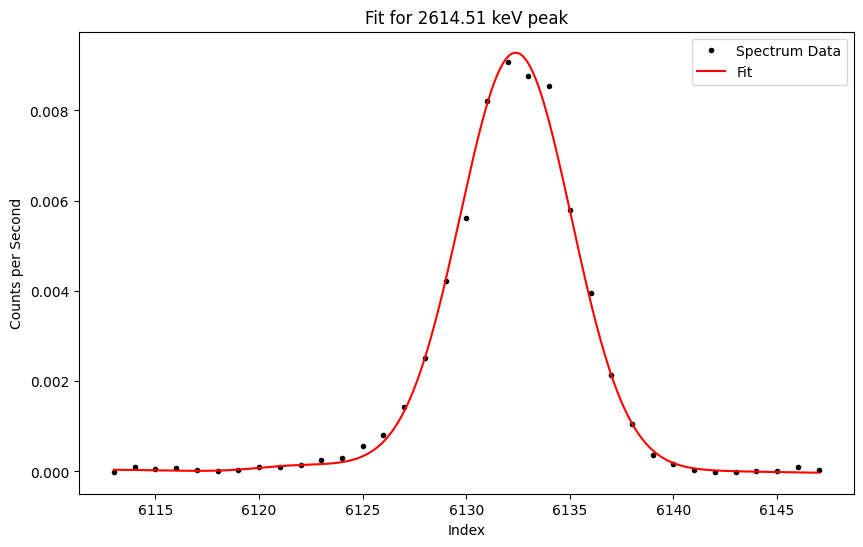

In [13]:
pf = PF(energies, soil_sample_67649, background_67649)

pf_counts, pf_counts_unc = pf.get_counts()
pf_counts_list = []
pf_counts_unc_list = []
sideband_counts_list = []
sideband_counts_unc_list = []

for i, energy in enumerate(energies):
    print(f"Counts at {energy} keV: {pf_counts[i]} +/- {pf_counts_unc[i]})")
    pf_counts_list.append(pf_counts[i])
    pf_counts_unc_list.append(pf_counts_unc[i])
    pf.plot_roi(energy)

for i, energy in enumerate(energies):
    sideband_counts_list.append(sideband_counts[i])
    sideband_counts_unc_list.append(sideband_counts_unc[i])

Counts at 661.657 keV: 1248.2824579529324 +/- 1248.2813028154717)


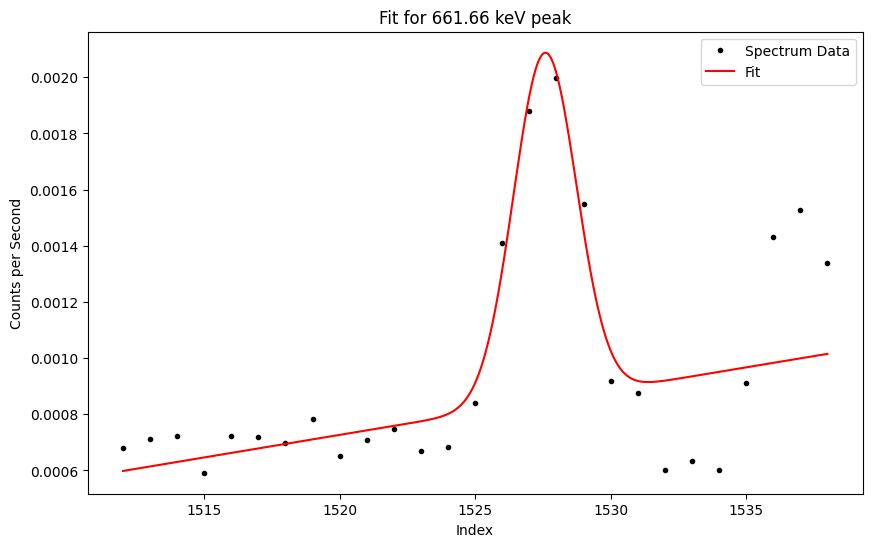

Counts at 609.31 keV: 31348.866521896387 +/- 31348.533216793432)


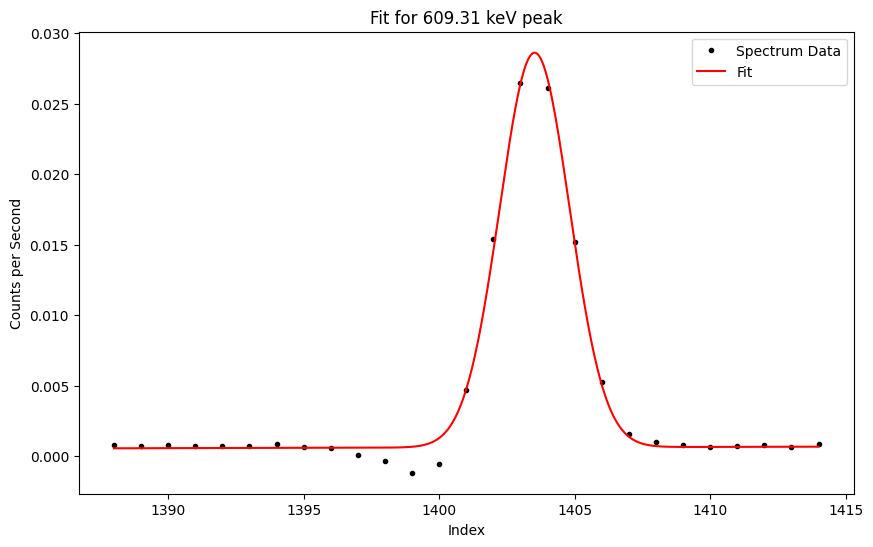

Counts at 1120.29 keV: 0.0 +/- 0.0)


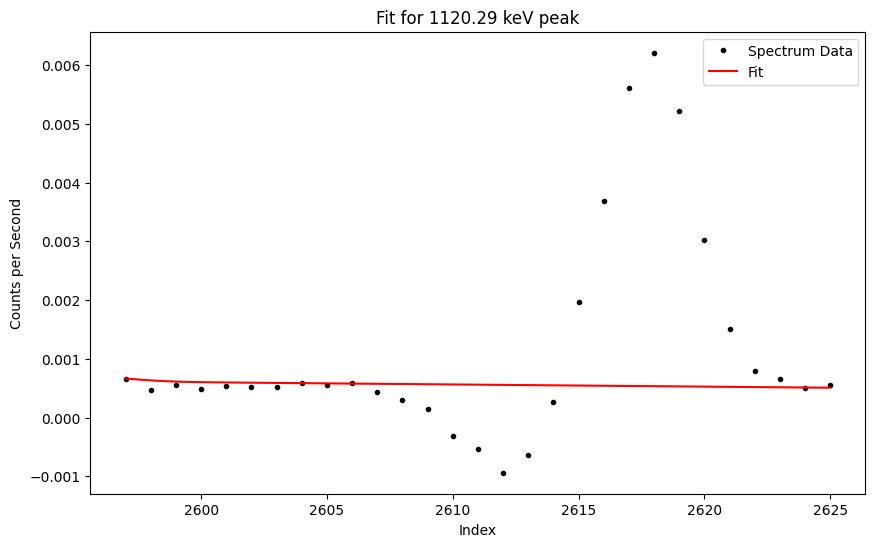

Counts at 1764.49 keV: 6.4630880115954696e-09 +/- 3.4944488538040573e-09)


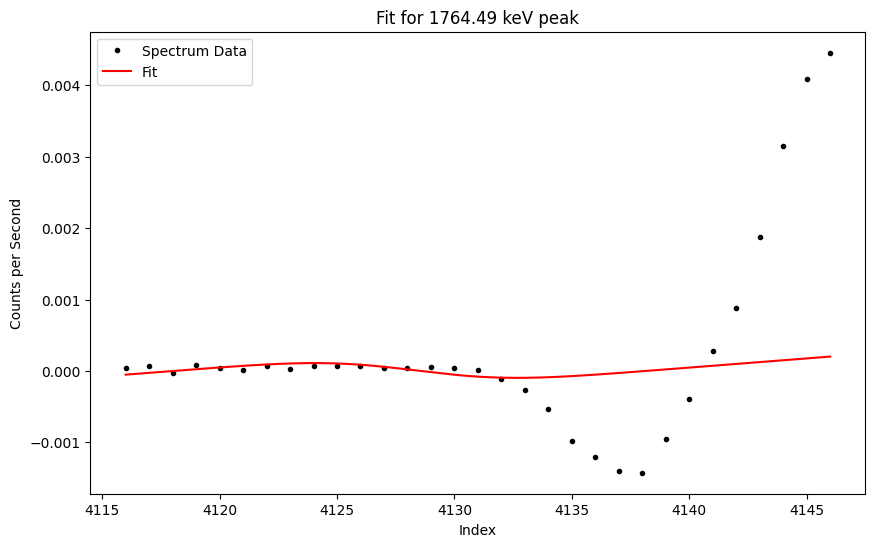

Counts at 1460.83 keV: 0.0 +/- 0.0)


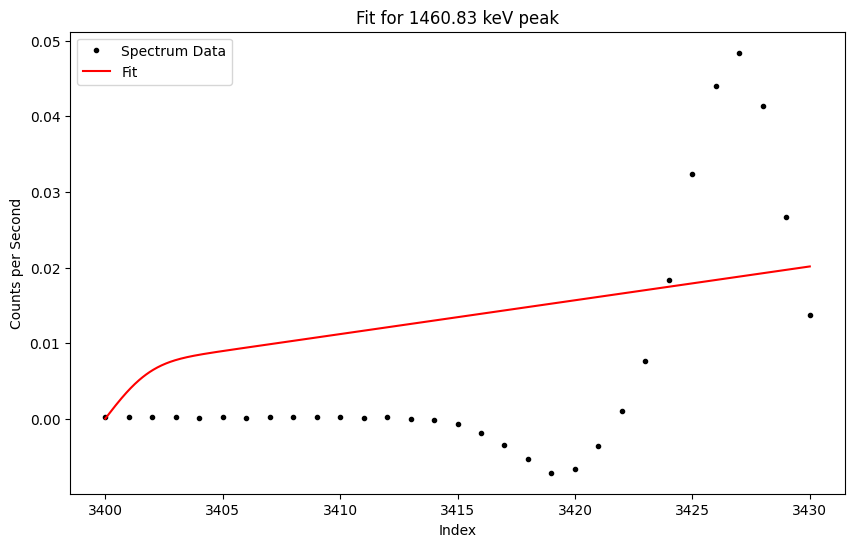

Counts at 2614.511 keV: 0.0 +/- 0.0)


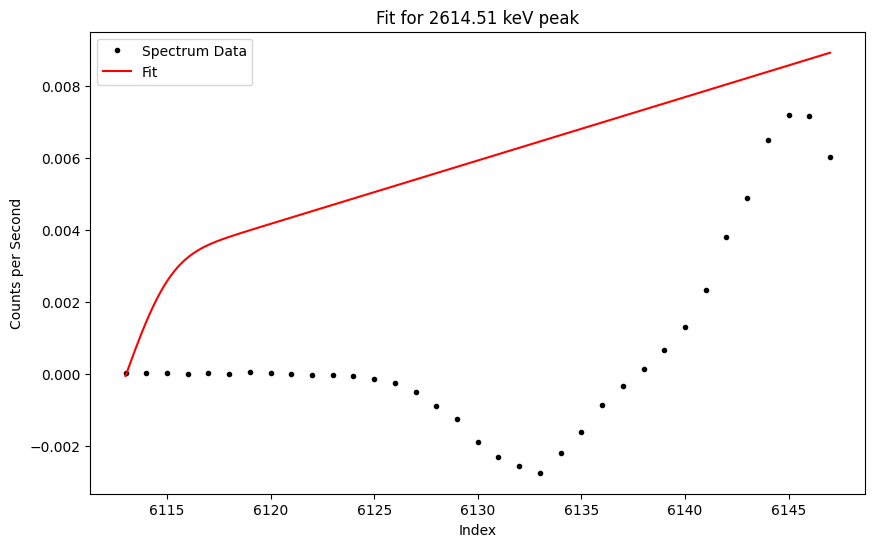

In [14]:
#control
pf_ctrl = PF(energies, soil_sample_15598, background_15598)
pf_ctrl_counts, pf_ctrl_counts_unc = pf_ctrl.get_counts()
pf_ctrl_counts_list = []
pf_ctrl_counts_unc_list = []

sideband_ctrl_counts_list = []
sideband_ctrl_counts_unc_list = []

for i, energy in enumerate(energies):
    print(f"Counts at {energy} keV: {pf_ctrl_counts[i]} +/- {pf_ctrl_counts_unc[i]})")
    pf_ctrl_counts_list.append(pf_ctrl_counts[i])
    pf_ctrl_counts_unc_list.append(pf_ctrl_counts_unc[i])
    pf_ctrl.plot_roi(energy)

for i, energy in enumerate(energies):
    sideband_ctrl_counts_list.append(sideband_ctrl_counts[i])
    sideband_ctrl_counts_unc_list.append(sideband_ctrl_counts_unc[i])

Counts at 661.657 keV: 6491.8298060946045 +/- 6491.807433109567)


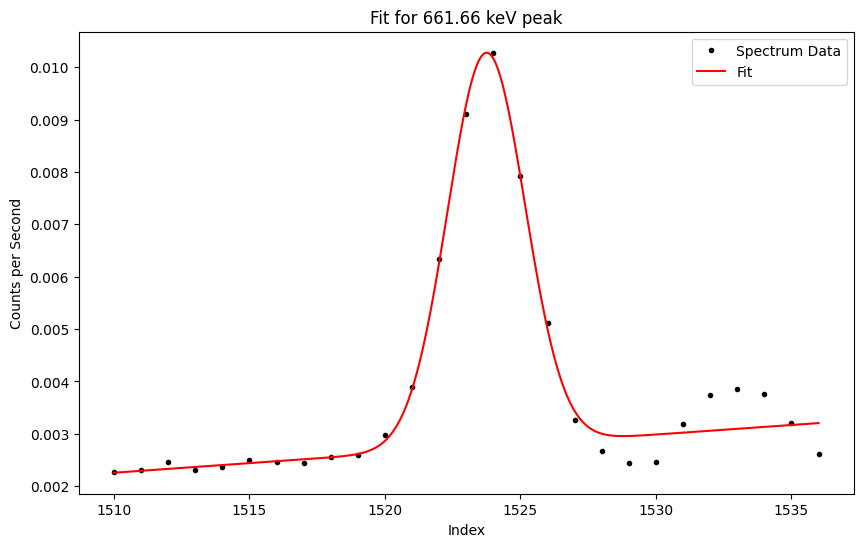

Counts at 609.31 keV: 57034.5058705843 +/- 57033.715179605075)


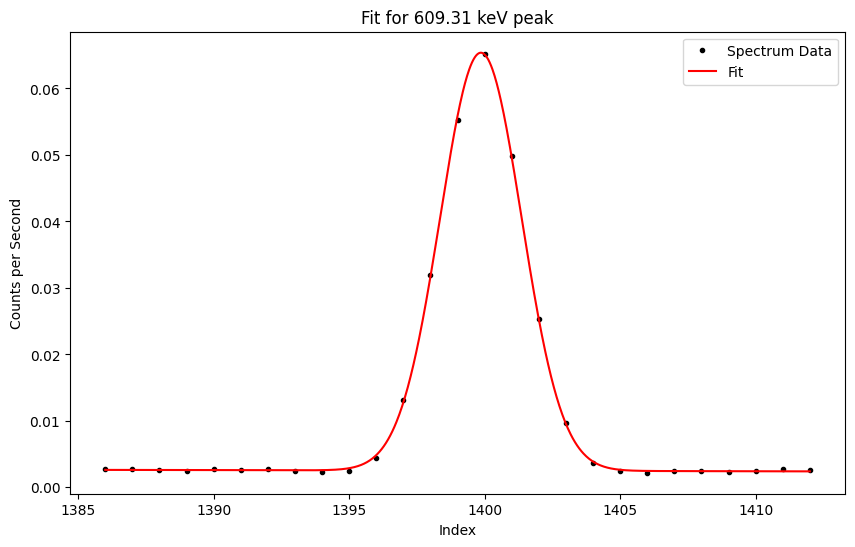

Counts at 1120.29 keV: 16344.782509103727 +/- 378.07248110093497)


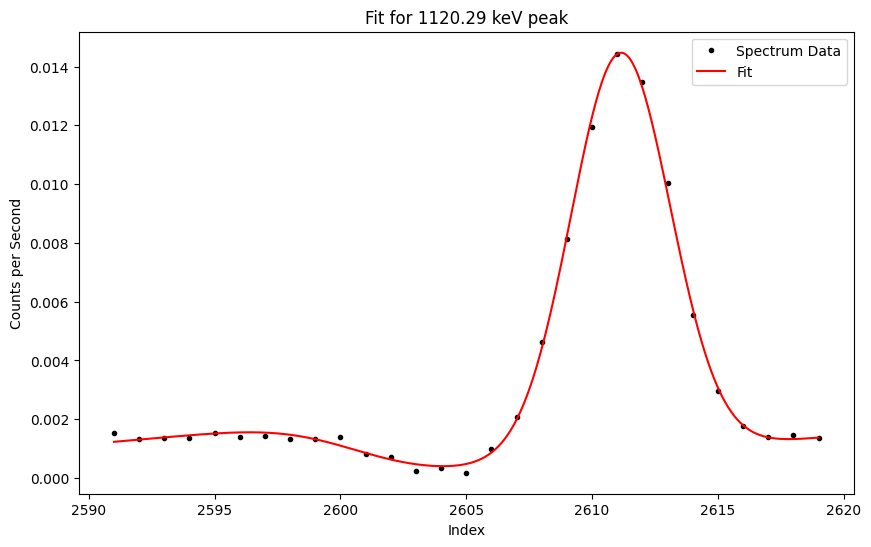

Counts at 1764.49 keV: 0.0 +/- 0.0)


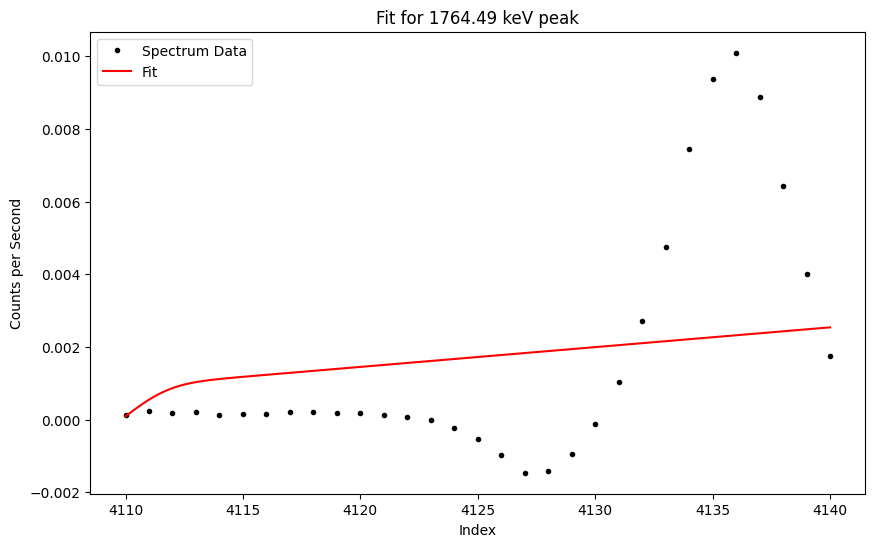

Counts at 1460.83 keV: 0.0 +/- 0.0)


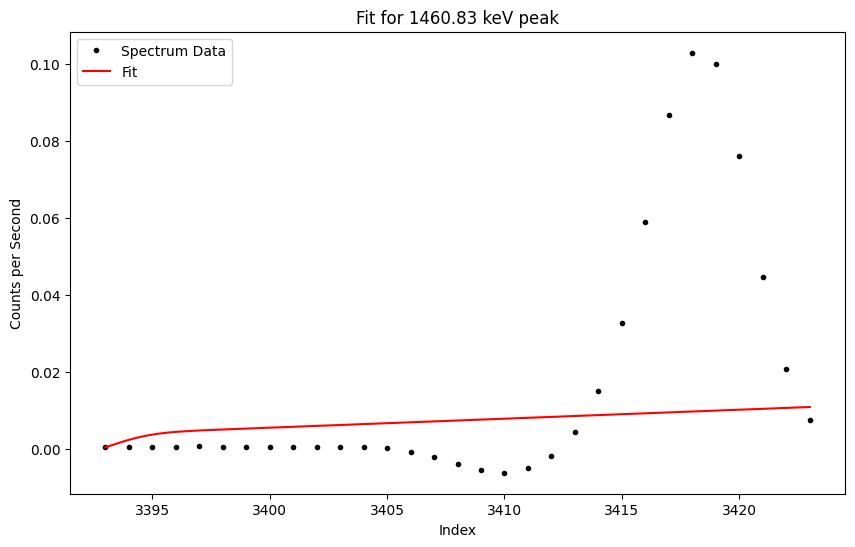

Counts at 2614.511 keV: 18071.29519252718 +/- 18038.280248446237)


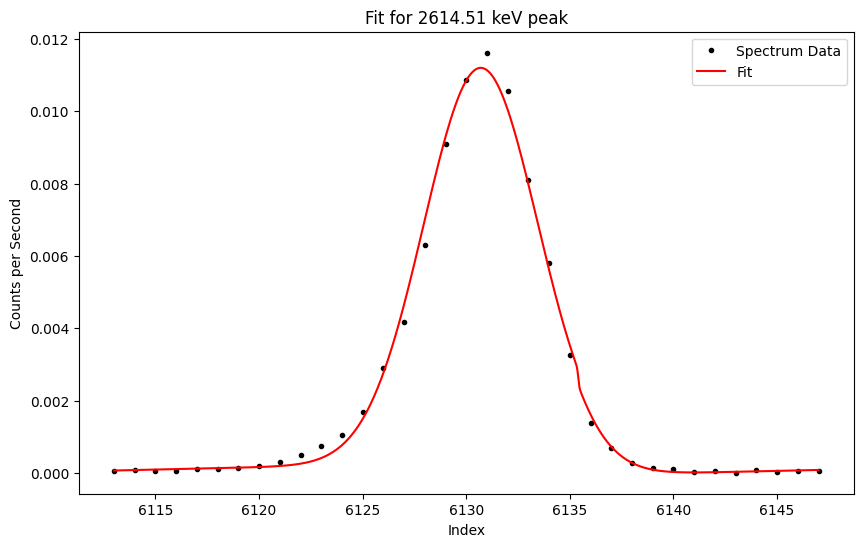

In [15]:
pf_31760 = PF(energies, soil_sample_31760, background_31760)

pf_counts_31760, pf_counts_unc_31760 = pf_31760.get_counts()
pf_counts_list_31760 = []
pf_counts_unc_list_31760 = []
sideband_counts_list_31760 = []
sideband_counts_unc_list_31760 = []

for i, energy in enumerate(energies):
    print(f"Counts at {energy} keV: {pf_counts_31760[i]} +/- {pf_counts_unc_31760[i]})")
    pf_counts_list_31760.append(pf_counts_31760[i])
    pf_counts_unc_list_31760.append(pf_counts_unc_31760[i])
    pf_31760.plot_roi(energy)

for i, energy in enumerate(energies):
    sideband_counts_list_31760.append(sideband_counts_31760[i])
    sideband_counts_unc_list_31760.append(sideband_counts_unc_31760[i])

In [16]:
print(pf_ctrl_counts_list)
print(pf_counts_list)
print(pf_counts_list_31760)

[1248.2824579529324, 31348.866521896387, 0.0, 6.4630880115954696e-09, 0.0, 0.0]
[1923.5526085732042, 16581.279702983742, 3754.9204620094765, 3034.385530661964, 29950.722369500752, 4773.734355024517]
[6491.8298060946045, 57034.5058705843, 16344.782509103727, 0.0, 0.0, 18071.29519252718]


In [17]:
print(sideband_ctrl_counts_list)
print(sideband_counts_list)
print(sideband_counts_list_31760)

[1435.312441783628, 29175.715315132744, 6514.122469413161, 5585.829565002806, 72662.88761729219, 10840.768895694697]
[1745.7819841430687, 16534.85726817405, 3574.6406705075137, 3155.575828725283, 30633.329698040016, 4920.1843484141]
[7544.947726461708, 56677.16006290063, 13096.714159451662, 11721.003339307283, 125599.07742426399, 19147.115740326044]


THIS IS NOT THE EFFICIENCY WE SHOULD USE FOR THIS SAMPLE, THIS IS FOR DEMONSTRATION PURPOSES ONLY, REFER TO THE SAMPLE DATA SPREADSHEET FOR WHICH EFFICIENCY CURVE TO USE!!

<sup>As of 7/17/2025 we do not have efficiency curve for any of the samples</sup>

Loaded fit parameters 0-4: [-0.13010513 -0.75302904 -1.84485211 -2.75719767 -3.14480867]
Loaded fit covariance: [[ 0.05529004  0.34923072  0.70173304  0.4885561   0.07399395]
 [ 0.34923072  2.25946367  4.685901    3.38782011  0.53581096]
 [ 0.70173304  4.685901   10.12919203  7.70258262  1.29967349]
 [ 0.4885561   3.38782011  7.70258262  6.26951727  1.18318077]
 [ 0.07399395  0.53581096  1.29967349  1.18318077  0.29970342]]


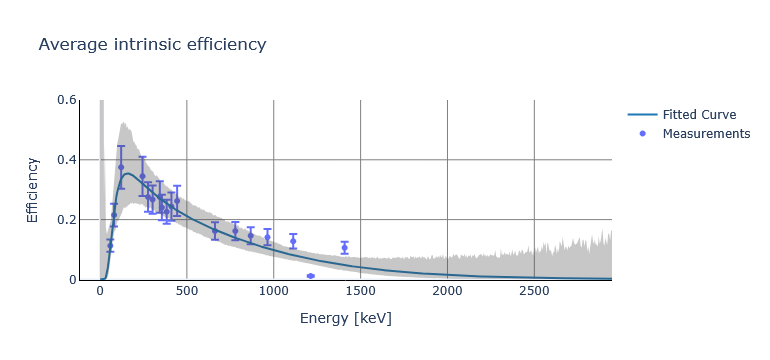

In [18]:
eff_func = am.Efficiency()
eff_func.set_parameters(r"data/average_efficiency.json")
eff_func.plotter_pretty(ylim = 0.6, title = "Average intrinsic efficiency", save = False)

In [19]:
pf_en_counts_unc = [[ene, pf_counts[i]/eff_func.get_eff(ene),pf_counts_unc[i]/eff_func.get_eff(ene)] 
                    for (i, ene) in enumerate(energies)]
sideband_en_counts_unc = [[ene, sideband_counts[i]/eff_func.get_eff(ene),sideband_counts_unc[i]/eff_func.get_eff(ene)] 
                          for (i, ene) in enumerate(energies)]
print("Values for sample 67649")
for i in range(len(energies)):
    print(f"PF:{pf_en_counts_unc[i]}\nSideband:{sideband_en_counts_unc[i]}\n")


pf_ctrl_en_counts_unc = [[ene, pf_ctrl_counts[i]/eff_func.get_eff(ene),pf_ctrl_counts_unc[i]/eff_func.get_eff(ene)] 
                         for (i, ene) in enumerate(energies)]
sideband_ctrl_en_counts_unc = [[ene, sideband_ctrl_counts[i]/eff_func.get_eff(ene),sideband_ctrl_counts_unc[i]/eff_func.get_eff(ene)] 
                               for (i, ene) in enumerate(energies)]
print("Values for sample 15598 (Control Group)")
for i in range(len(energies)):
    print(f"PF:{pf_ctrl_en_counts_unc[i]}\nSideband:{sideband_ctrl_en_counts_unc[i]}\n")

Values for sample 67649
PF:[661.657, 11582.02718016507, 11581.83562121264]
Sideband:[661.657, 10511.64096103693, 488.12508595739]

PF:[609.31, 92314.81929222208, 1051.3690186208569]
Sideband:[609.31, 92056.36646123881, 895.8946797384435]

PF:[1120.29, 47104.692942579226, 47097.978364519484]
Sideband:[1120.29, 44843.12061145518, 1263.869888028175]

PF:[1764.49, 127250.79687950526, 126046.52165050247]
Sideband:[1764.49, 132333.06538058718, 3135.6460967713565]

PF:[1460.83, 695089.971176439, 11189.389335145406]
Sideband:[1460.83, 710931.7763411232, 4586.772884136849]

PF:[2614.511, 1212749.8238085785, 32334.261792066554]
Sideband:[2614.511, 1249954.9111618467, 22971.318628597477]

Values for sample 15598 (Control Group)
PF:[661.657, 7516.1143459747045, 7516.1073907017335]
Sideband:[661.657, 8642.252693622871, 823.3424070974189]

PF:[609.31, 174532.0626528058, 174530.20700590158]
Sideband:[609.31, 162433.23406173146, 1382.5170680570416]

PF:[1120.29, 0.0, 0.0]
Sideband:[1120.29, 81718.3058

You want to now calculate activites, you do that by (cps @ energy)/(branching ratio) for each energy associated with an isotope, then sum it all. Make sure to propagate uncertainities properly.

In [20]:
branching_ratios = {
    661.657: 0.851,  # Cs-137
    609.31: 0.4544, # Bi-214
    1120.29: 0.1490, # Bi-214
    1764.49: 0.1529, # Bi-214
    1460.83: 0.1066, # K-40
    2614.511: 0.99754 #Tl-208
}
#should use mass of soil - need to weigh samples (don't need to divide by weights for now) 

live_time_67649 = soil_sample_67649.livetime

activities_and_unc_67649 = []
all_activities_67649 = []
all_uncertainties_67649 = []

for i in range(len(energies)):
    energy = energies[i]
    activity = sideband_counts_list[i]/branching_ratios.get(energy,None)
    activity_unc = sideband_counts_unc_list[i]/branching_ratios.get(energy,None)
    activities_and_unc_67649.append([energy,activity,activity_unc])

'''
for energy, act, unc in activities_and_unc:
    print(f"Energy: {energy:.1f} keV | Activity: {act:.3e} Bq/kg ± {unc:.3e}")
'''
for i in range(len(activities_and_unc_67649)):
    act = activities_and_unc_67649[i][1]
    all_activities_67649.append(act) 
    unc = activities_and_unc_67649[i][2]
    all_uncertainties_67649.append(unc)

In [21]:
live_time_15598 = soil_sample_15598.livetime

activities_and_unc_15598 = []
all_activities_15598 = []
all_uncertainties_15598 = []

for i in range(len(energies)):
    energy = energies[i]
    activity_ctrl = sideband_ctrl_counts_list[i]/branching_ratios.get(energy,None)
    activity_ctrl_unc = sideband_ctrl_counts_unc_list[i]/branching_ratios.get(energy,None)
    activities_and_unc_15598.append([energy,activity_ctrl,activity_ctrl_unc])
'''
for energy, act, unc in activities_and_unc_15598:
    print(f"Energy: {energy:.1f} keV | Activity: {act:.3e} Bq/kg ± {unc:.3e}")
'''
for i in range(len(activities_and_unc_15598)):
    act = activities_and_unc_15598[i][1]
    all_activities_15598.append(act) 
    unc = activities_and_unc_15598[i][2]
    all_uncertainties_15598.append(unc) 

In [22]:
live_time_31760 = soil_sample_31760.livetime

activities_and_unc_31760 = []
all_activities_31760 = []
all_uncertainties_31760 = []

for i in range(len(energies)):
    energy = energies[i]
    activity_31760 = sideband_counts_list_31760[i]/branching_ratios.get(energy,None)
    activity_unc_31760 = sideband_counts_unc_list_31760[i]/branching_ratios.get(energy,None)
    activities_and_unc_31760.append([energy,activity_31760,activity_unc_31760])
'''
for energy, act, unc in activities_and_unc_31760:
    print(f"Energy: {energy:.1f} keV | Activity: {act:.3e} Bq/kg ± {unc:.3e}")
'''
for i in range(len(activities_and_unc_31760)):
    act = activities_and_unc_31760[i][1]
    all_activities_31760.append(act) 
    unc = activities_and_unc_31760[i][2]
    all_uncertainties_31760.append(unc) 

In [23]:
combine_bi214_act_67649 = all_activities_67649[1] + all_activities_67649[2] + all_activities_67649[3]
combine_bi214_unc_67649 = np.sqrt((all_uncertainties_67649[1] **2) + (all_uncertainties_67649[2]**2) + (all_uncertainties_67649[3] **2))

combine_bi214_act_15598 = all_activities_15598[1] + all_activities_15598[2] + all_activities_15598[3]
combine_bi214_unc_15598 = np.sqrt((all_uncertainties_15598[1] **2) + (all_uncertainties_15598[2]**2) + (all_uncertainties_15598[3] **2))

combine_bi214_act_31760 = all_activities_31760[1] + all_activities_31760[2] + all_activities_31760[3]
combine_bi214_unc_31760 = np.sqrt((all_uncertainties_31760[1] **2) + (all_uncertainties_31760[2]**2) + (all_uncertainties_31760[3] **2))

In [24]:
print(all_activities_67649)

[2051.447689944852, 36388.330255664725, 23990.876983271904, 20638.167617562347, 287367.07033808646, 4932.317850325901]


C:\Users\twang\AppData\Local\Temp\ipykernel_9148\1580102998.py:64: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



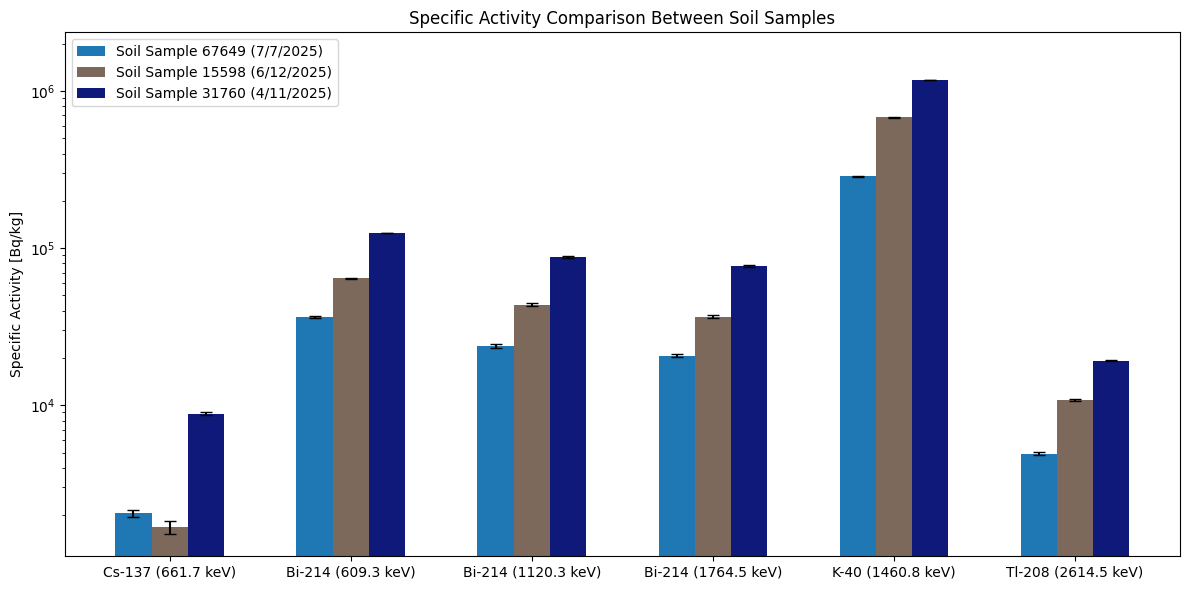

In [25]:
#non combined Bi214 peaks
isotopes = [
    "Cs-137 (661.7 keV)",
    "Bi-214 (609.3 keV)",
    "Bi-214 (1120.3 keV)",
    "Bi-214 (1764.5 keV)",
    "K-40 (1460.8 keV)",
    "Tl-208 (2614.5 keV)"
]

activities = np.array(all_activities_67649 + all_activities_15598 + all_activities_31760)
uncertainties = np.array(all_uncertainties_67649 + all_uncertainties_15598 + all_uncertainties_31760)

lower_bounds = activities - uncertainties
upper_bounds = activities + uncertainties

y_min = max(min(lower_bounds[lower_bounds > 0]), 1e-4)
y_max = max(upper_bounds)

x = np.arange(len(isotopes))
bar_width = 0.2  

fig, ax = plt.subplots(figsize=(12, 6))

# Sample 67649
ax.bar(
    x - bar_width, 
    all_activities_67649, 
    yerr=all_uncertainties_67649, 
    width=bar_width, 
    label='Soil Sample 67649 (7/7/2025)', 
    color='#1f77b4', 
    capsize=4
)

# Sample 15598
ax.bar(
    x, 
    all_activities_15598, 
    yerr=all_uncertainties_15598, 
    width=bar_width, 
    label='Soil Sample 15598 (6/12/2025)', 
    color='#7d695c', 
    capsize=4
)

# Sample 31760 
ax.bar(
    x + bar_width, 
    all_activities_31760, 
    yerr=all_uncertainties_31760, 
    width=bar_width, 
    label='Soil Sample 31760 (4/11/2025)', 
    color='#0f197a', 
    capsize=4
)

ax.set_xticks(x)
ax.set_xticklabels(isotopes)
ax.set_yscale("log")
ax.set_ylabel('Specific Activity [Bq/kg]')
ax.set_title('Specific Activity Comparison Between Soil Samples')
ax.legend()
ax.set_ylim(0, y_max * 2) 

plt.tight_layout()
plt.show()

C:\Users\twang\AppData\Local\Temp\ipykernel_9148\297437444.py:70: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



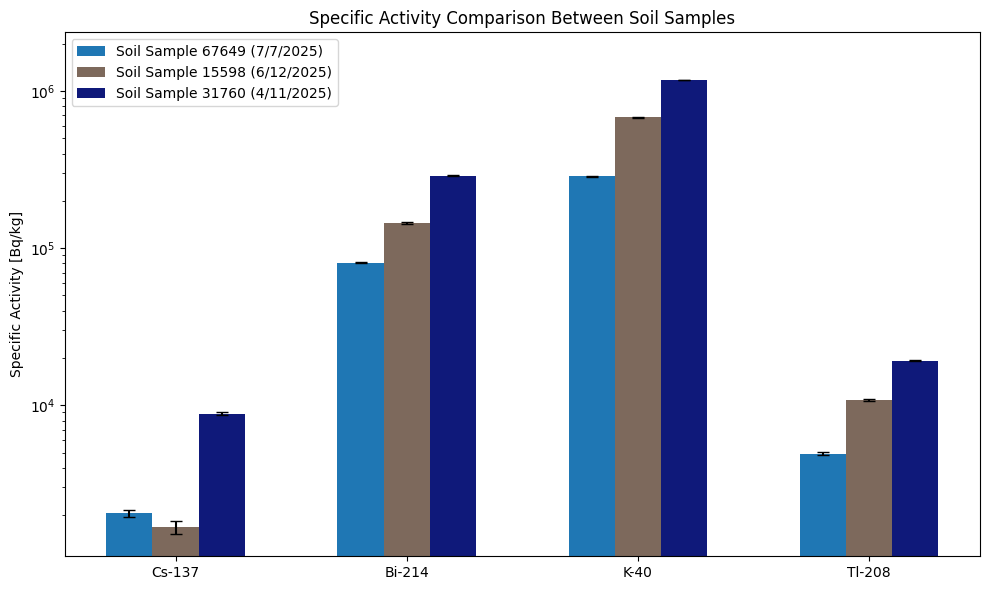

In [26]:
isotopes_combined = [
    "Cs-137",
    "Bi-214",
    "K-40",
    "Tl-208"
]

activities_67649 = [all_activities_67649[0], combine_bi214_act_67649, all_activities_67649[4], all_activities_67649[5]]
unc_67649 = [all_uncertainties_67649[0], combine_bi214_unc_67649, all_uncertainties_67649[4], all_uncertainties_67649[5]]

activities_15598 = [all_activities_15598[0], combine_bi214_act_15598, all_activities_15598[4], all_activities_15598[5]]
unc_15598 = [all_uncertainties_15598[0], combine_bi214_unc_15598, all_uncertainties_15598[4], all_uncertainties_15598[5]]

activities_31760 = [all_activities_31760[0], combine_bi214_act_31760, all_activities_31760[4], all_activities_31760[5]]
unc_31760 = [all_uncertainties_31760[0], combine_bi214_unc_31760, all_uncertainties_31760[4], all_uncertainties_31760[5]]

activities = np.array(activities_67649 + activities_15598 + activities_31760)
uncertainties = np.array(unc_67649 + unc_15598 + unc_31760)

lower_bounds = activities - uncertainties
upper_bounds = activities + uncertainties

y_min = max(min(lower_bounds[lower_bounds > 0]), 1e-4)
y_max = max(upper_bounds)

x = np.arange(len(isotopes_combined))
bar_width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

# Sample 67649
ax.bar(
    x - bar_width, 
    activities_67649, 
    yerr=unc_67649, 
    width=bar_width, 
    label='Soil Sample 67649 (7/7/2025)', 
    color='#1f77b4', 
    capsize=4
)

# Sample 15598
ax.bar(
    x, 
    activities_15598, 
    yerr=unc_15598, 
    width=bar_width, 
    label='Soil Sample 15598 (6/12/2025)', 
    color='#7d695c', 
    capsize=4
)

# Sample 31760 
ax.bar(
    x + bar_width, 
    activities_31760, 
    yerr=unc_31760, 
    width=bar_width, 
    label='Soil Sample 31760 (4/11/2025)', 
    color='#0f197a', 
    capsize=4
)

ax.set_xticks(x)
ax.set_xticklabels(isotopes_combined)
ax.set_yscale("log")
ax.set_ylabel('Specific Activity [Bq/kg]')
ax.set_title('Specific Activity Comparison Between Soil Samples')
ax.legend()
ax.set_ylim(0, y_max * 2) 

plt.tight_layout()
plt.show()
#would expect 2 mag more of k-40 than cs-137 (cs137 should be last) 

In [27]:
print(activities_67649)
print(activities_15598)
print(activities_31760)

[2051.447689944852, 81017.37485649898, 287367.07033808646, 4932.317850325901]
[1686.6186154919249, 144458.6301818344, 681640.596785105, 10867.502952958976]
[8865.978526982031, 289285.0443074907, 1178227.7431919698, 19194.33380147768]


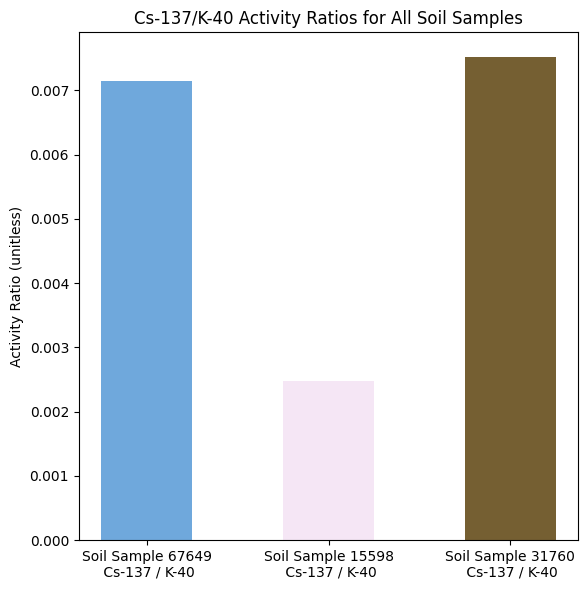

In [33]:
cs137_activity_67649 = activities_67649[0]
k40_activity_67649 = activities_67649[2]
tl208_activity_67649 = activities_67649[3]

cs137_activity_15598 = activities_15598[0]
k40_activity_15598 = activities_15598[2]
tl208_activity_15598 = activities_15598[3]

cs137_activity_31760 = activities_31760[0]
k40_activity_31760 = activities_31760[2]
tl208_activity_31760 = activities_31760[3]


#ratio_k40 = cs137_activity/k40_activity
#ratio_tl208 = cs137_activity/tl208_activity
ratios = [cs137_activity_67649/k40_activity_67649,
          cs137_activity_15598/k40_activity_15598,
         cs137_activity_31760/k40_activity_31760]
labels = ['Soil Sample 67649\n Cs-137 / K-40',
         'Soil Sample 15598\n Cs-137 / K-40',
         'Soil Sample 31760\n Cs-137 / K-40']

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(labels, ratios, width = 0.5, color=['#6fa8dc', '#f5e6f5', '#755f32'])
ax.set_ylabel('Activity Ratio (unitless)')
ax.set_title('Cs-137/K-40 Activity Ratios for All Soil Samples')
plt.tight_layout()
plt.show()

#make bar charts for the combined data (with all the samples together) 
#have 2 graphs: one for cs/k and another for cs/tl (and combine all) 

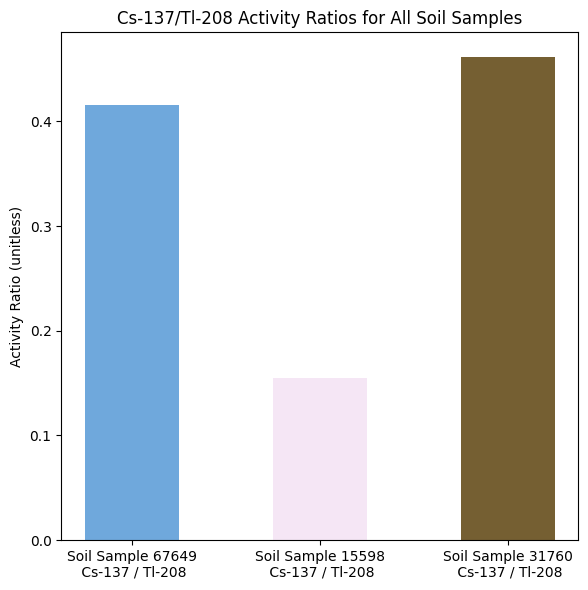

In [34]:
cs137_activity_67649 = activities_67649[0]
k40_activity_67649 = activities_67649[2]
tl208_activity_67649 = activities_67649[3]

cs137_activity_15598 = activities_15598[0]
k40_activity_15598 = activities_15598[2]
tl208_activity_15598 = activities_15598[3]

cs137_activity_31760 = activities_31760[0]
k40_activity_31760 = activities_31760[2]
tl208_activity_31760 = activities_31760[3]


#ratio_k40 = cs137_activity/k40_activity
#ratio_tl208 = cs137_activity/tl208_activity
ratios = [cs137_activity_67649/tl208_activity_67649,
          cs137_activity_15598/tl208_activity_15598,
         cs137_activity_31760/tl208_activity_31760]
labels = ['Soil Sample 67649\n Cs-137 / Tl-208',
         'Soil Sample 15598\n Cs-137 / Tl-208',
     'Soil Sample 31760\n Cs-137 / Tl-208',]

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(labels, ratios, width = 0.5, color=['#6fa8dc', '#f5e6f5', '#755f32'])
ax.set_ylabel('Activity Ratio (unitless)')
ax.set_title('Cs-137/Tl-208 Activity Ratios for All Soil Samples')
plt.tight_layout()
plt.show()

#make bar charts for the combined data (with all the samples together) 
#have 2 graphs: one for cs/k and another for cs/tl (and combine all) 